<a href="https://colab.research.google.com/github/Kushaan-SSSK/Cleveland-Heart-Disease/blob/main/Machine_Learning_Models_for_Heart_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Kushaan-SSSK/Cleveland-Heart-Disease/refs/heads/main/Cleveland-Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [195]:
df.replace(['?', ' '], 0, inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df = df[df['num'].notna()]

df.fillna(df.mean(), inplace=True)

print("NaNs in data:", df.isna().sum().sum())

NaNs in data: 0


In [196]:
y = df['num']
y

,num
0,0.0
1,2.0
2,1.0
3,0.0
4,0.0
...,...
298,1.0
299,2.0
300,3.0
301,1.0


In [197]:
X = df.drop('num', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
133,51.0,1.0,4.0,140.0,261.0,0.0,2.0,186.0,1.0,0.0,1.0,0.0,3.0
203,64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0
197,45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0
76,60.0,1.0,4.0,125.0,258.0,0.0,2.0,141.0,1.0,2.8,2.0,1.0,7.0
177,56.0,1.0,4.0,132.0,184.0,0.0,2.0,105.0,1.0,2.1,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,69.0,1.0,3.0,140.0,254.0,0.0,2.0,146.0,0.0,2.0,2.0,3.0,7.0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0
107,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0
271,66.0,1.0,4.0,160.0,228.0,0.0,2.0,138.0,0.0,2.3,1.0,0.0,6.0


In [199]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0
229,66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1.0,3.0
112,52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0
247,47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0
61,46.0,0.0,3.0,142.0,177.0,0.0,2.0,160.0,1.0,1.4,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0
105,54.0,1.0,2.0,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
194,68.0,0.0,3.0,120.0,211.0,0.0,2.0,115.0,0.0,1.5,2.0,0.0,3.0


In [200]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [201]:
lr.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [202]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)


In [203]:
y_lr_train_pred

array([ 0.34482638,  0.41019762,  0.78505159,  2.13728618,  2.19998026,
        1.29533043, -0.21354884,  2.15252541,  0.86909567,  0.68608679,
        0.28106145,  0.27719867,  0.73406286,  1.22365906,  0.56774627,
        0.48447947,  2.00824271, -0.13399553,  0.92329543,  0.73701645,
        0.99511382,  0.00365846,  0.73568391,  1.52236323,  1.0555954 ,
        1.99537281, -0.17755382,  0.92015991,  1.34149251,  0.01931924,
        0.0306355 ,  1.47534161,  0.19178194,  0.83572389,  0.84948473,
        1.06499571,  0.4157923 ,  1.04153047,  0.14537811,  1.89217276,
        0.70841976,  2.19512568, -0.17413082,  0.63877037,  2.085272  ,
        1.25068275,  0.05255234,  1.93828408,  1.37523356,  2.50285462,
        1.56838503, -0.29370133,  0.09731329,  0.78548408,  2.22318422,
        0.14489291,  0.22541278, -0.06903785,  0.52612757,  0.05686532,
        1.54025953,  0.17091737,  1.22314647,  2.49405298,  0.67250636,
        1.20277911,  2.14167173,  0.57579303,  1.06665578,  0.76

In [204]:
y_lr_test_pred

array([ 0.9374928 ,  0.99703895, -0.09571327,  1.62641693,  0.96040537,
        1.92743643,  1.93956473,  1.63643688,  0.62085798,  0.83614812,
       -0.26814728,  0.59896227,  1.47151677,  2.07985456,  1.97159866,
        0.29570935,  3.21763384,  2.37246171,  3.23462246,  0.56686812,
        1.85804803,  0.13759221,  2.65942931,  0.41327836, -0.09075837,
       -0.18736164,  0.0923442 ,  0.65705221,  1.8613874 ,  1.23624494,
       -0.07527545,  1.03065499, -0.17210469,  0.58620948,  0.41685657,
        0.06321045,  0.85602727,  3.68325663,  2.62056883,  1.04444791,
        0.15604601, -0.02657323,  1.66734444,  0.41282358,  0.34877444,
        1.78791738, -0.1056898 ,  1.33867673,  1.8308796 ,  0.51250367,
        0.16792429,  1.05243058,  1.81366347,  1.19631   ,  0.93935888,
        2.70669144,  1.34661193,  0.10886963,  1.99947028,  0.56853784,
        0.44592735])

In [205]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [206]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [207]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.629152,0.563253,0.823684,0.529775


In [208]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [209]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [210]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [211]:
rf_results = pd.DataFrame(['Randon forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Randon forest,0.623509,0.56717,1.072543,0.387706


In [212]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.629152,0.563253,0.823684,0.529775
1,Randon forest,0.623509,0.56717,1.072543,0.387706


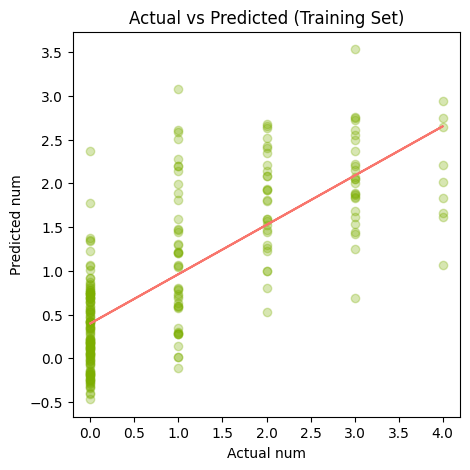

In [213]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)


z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='#F8766D')


plt.ylabel('Predicted num')
plt.xlabel('Actual num')
plt.title('Actual vs Predicted (Training Set)')

plt.show()

In [214]:
y_pred_test = lr.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
accuracy_percent = r2 * 100

print(f"Model Accuracy (R²): {accuracy_percent:.2f}%")

Model Accuracy (R²): 52.98%


In [191]:
!pip install xgboost

In [192]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('num', axis=1)
y = df['num']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:20:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 81.97%

Confusion Matrix:
 [[25  7]
 [ 4 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



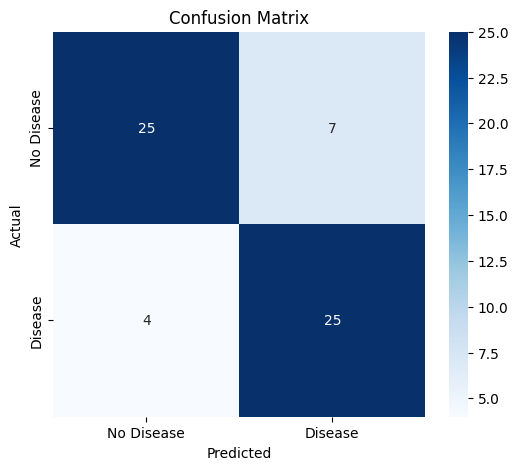

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease','Disease'], yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()